In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2022_MCD3735A/Módulo 6 - Discretización de variables/'

In [2]:
data=pd.read_csv(ruta+'dataKmeans.csv')
data.head()

,x,y
0,-1.905967,-0.780757
1,-2.934568,-0.955310
2,-2.178603,-0.960997
3,-1.870977,-0.791746
4,-2.513686,-0.968655


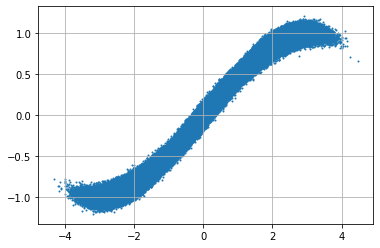

In [3]:
plt.scatter(data['x'],data['y'],s=1)
plt.grid()

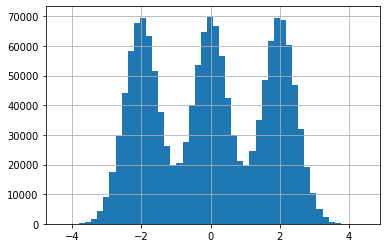

In [4]:
plt.hist(data['x'],bins=50)
plt.grid()

# Discretización

In [5]:
# Centroides
# 
K=3
m=data['x'].min()
M=data['x'].max()
ctr=np.random.uniform(m,M,K)
ctr

array([1.68192732, 4.44406944, 4.10210342])

In [6]:
ctr=[np.random.uniform(m+(M-m)/K*i,m+(M-m)/K*(i+1)) for i in range(K)]
ctr=np.array(ctr)
ctr

array([-2.59327564, -1.23026509,  2.9084655 ])

In [7]:
# Métrica
# 
d=np.abs(ctr-data['x'].iloc[-1])
d

array([5.45559247, 4.09258192, 0.04614867])

In [8]:
idx=np.argmin(d)
idx

2

In [9]:
# Definición de los grupos
# 
Grupos=[]
for i in range(K):
  Grupos.append([])

In [10]:
Grupos[idx].append(data['x'].iloc[-1])
Grupos

[[], [], [2.862316829699993]]

In [11]:
# Agrupación
# 
Grupos=[]
for i in range(K):
  Grupos.append([])
for x in data['x']:
  # Medimos distancia
  d=np.abs(ctr-x)
  # Vemos cuál es la menor de ellas
  idx=np.argmin(d)
  # Almacenamos la observación en el grupo correspondiente
  Grupos[idx].append(x)
for i in range(K):
  print(len(Grupos[i]))

285299
696425
518276


In [12]:
# Cálculo de nuevos centroides
# 
# Promediamos 'Grupos'
for i in range(K):
  ctr[i]=np.mean(Grupos[i])
ctr

array([-2.3450131 , -0.50517881,  1.97028768])

In [13]:
# Reagrupación
# 
# Se ejecuta el código de 'Agrupación' y de 'Cálculo de nuevos centroides' tantas veces como sea necesario

Creamos una función que, dados como argumentos los datos a discretizar y el número de agrupaciones, nos regrese los centroides a los que pertenece cada observación.

In [14]:
# Definición de la función
# 
def Kmeans(X,K):
  # Definimos los centroides de forma aleatoria
  m=min(X)
  M=max(X)
  ctr=np.array([np.random.uniform(m+(M-m)*i/K,m+(M-m)*(i+1)/K) for i in range(K)])

  ctra=np.inf*np.ones(K)
  while np.sum(np.abs(ctr-ctra))>1e-4:
    Grupos=[]
    for i in range(K):
      Grupos.append([])
    for x in X:
      d=np.abs(ctr-x)
      idx=np.argmin(d)
      Grupos[idx].append(x)
    ctra=ctr.copy()
    for i in range(K):
      ctr[i]=np.mean(Grupos[i])
  G=[]
  for x in X:
    d=np.abs(ctr-x)
    idx=np.argmin(d)
    G.append(ctr[idx])
  return G

In [15]:
data['kmeans']=Kmeans(data['x'],K)
data.head()

,x,y,kmeans
0,-1.905967,-0.780757,-2.010175
1,-2.934568,-0.955310,-2.010175
2,-2.178603,-0.960997,-2.010175
3,-1.870977,-0.791746,-2.010175
4,-2.513686,-0.968655,-2.010175


In [16]:
# Histográma de cada grupo
# 
ctr=data['kmeans'].unique()
ctr

array([-2.01017534e+00,  7.48349719e-04,  2.00995609e+00])

In [17]:
data.groupby('kmeans')['x'].mean()

kmeans
-2.010175   -2.010177
 0.000748    0.000744
 2.009956    2.009954
Name: x, dtype: float64

kmeans
-2.010175    AxesSubplot(0.125,0.125;0.775x0.755)
 0.000748    AxesSubplot(0.125,0.125;0.775x0.755)
 2.009956    AxesSubplot(0.125,0.125;0.775x0.755)
Name: x, dtype: object

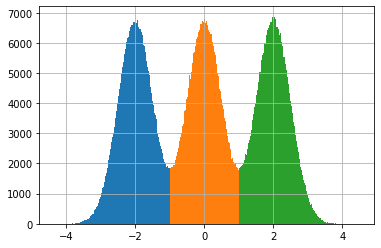

In [18]:
data.groupby('kmeans')['x'].hist(bins='auto')

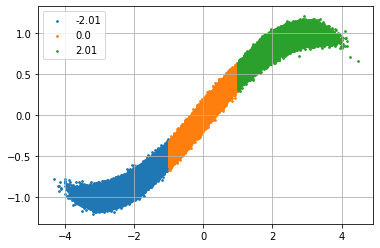

In [19]:
# Relación 'x' vs 'y' de cada grupo
# 
for i in range(K):
  x=data.groupby('kmeans')['x'].get_group(ctr[i])
  y=data.groupby('kmeans')['y'].get_group(ctr[i])
  plt.scatter(x,y,s=3,label=round(ctr[i],2))
plt.legend()
plt.grid()

# Regresión lineal

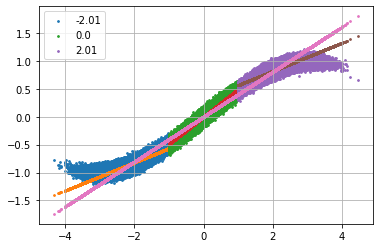

In [21]:
# Regresión del conjunto completo
#
lin=LinearRegression()
lin.fit(data[['x']],data['y'])
Llin=[]
for c in ctr:
  x=data.groupby('kmeans')[['x']].get_group(c)
  y=data.groupby('kmeans')['y'].get_group(c)
  Llin.append(LinearRegression())
  Llin[-1].fit(x,y)

  plt.scatter(x,y,s=3,label=round(c,2))
  plt.scatter(x,Llin[-1].predict(x),s=3)
plt.scatter(data['x'],lin.predict(data[['x']]),s=3)
plt.legend()
plt.grid()

# Usando `KBinsDiscretizer`

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

In [23]:
# Discretización
# 
disc=KBinsDiscretizer(n_bins=K,encode='ordinal',strategy='kmeans')
data['KBmeans']=disc.fit_transform(data[['x']])
data.head(3)

,x,y,kmeans,KBmeans
0,-1.905967,-0.780757,-2.010175,0.0
1,-2.934568,-0.955310,-2.010175,0.0
2,-2.178603,-0.960997,-2.010175,0.0


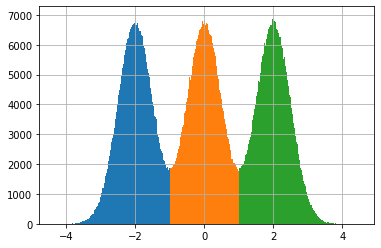

In [25]:
# Histograma de cada grupo
#
H=data.groupby('KBmeans')['x'].hist(bins='auto')

In [24]:
# Promedio de cada grupo
#
data.groupby('KBmeans')['x'].mean()

KBmeans
0.0   -2.009801
1.0    0.001508
2.0    2.010344
Name: x, dtype: float64

In [26]:
disc.bin_edges_

array([array([-4.33379594, -1.0030711 ,  1.00716735,  4.47661721])],
      dtype=object)

# Kmeans 2D

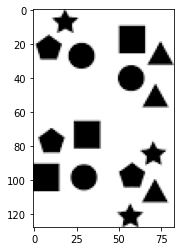

In [28]:
Figura=plt.imread(ruta+'Figuras.png')
plt.imshow(Figura)

In [29]:
Figura.shape

(128, 83, 3)

In [31]:
FiguraG=Figura.mean(axis=2)
FiguraG.shape

(128, 83)

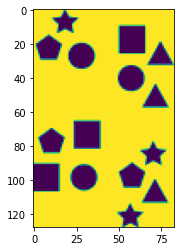

In [32]:
plt.imshow(FiguraG)

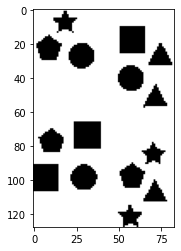

In [34]:
U=0.5
FiguraBN=FiguraG<U
plt.imshow(~FiguraBN,cmap='gray')

In [35]:
df=pd.DataFrame(columns=['x','y'])
coor=[]
for ix in range(FiguraBN.shape[0]):
  for iy in range(FiguraBN.shape[1]):
    if FiguraBN[ix,iy]:
      coor.append(np.array([ix,iy]))
df[['x','y']]=coor
df.head()

,x,y
0,1,18
1,1,19
2,2,18
3,2,19
4,3,17


In [40]:
# Definición del centroide en 2D
K=4
mx=df['x'].min()
Mx=df['x'].max()
my=df['y'].min()
My=df['y'].max()
kx=round(np.sqrt(K))
ky=round(K/kx)
ctr=[
     [np.random.uniform(mx+(Mx-mx)/kx*ix,mx+(Mx-mx)/kx*(ix+1)),
      np.random.uniform(my+(My-my)/ky*iy,my+(My-my)/ky*(iy+1))] for ix in range(kx) for iy in range(ky)
]
ctr=np.array(ctr[:K])
ctr

array([[19.4369365 , 22.82159231],
       [25.15941668, 60.88041726],
       [77.98227127, 25.66078557],
       [90.03941313, 69.01360462]])

In [44]:
# Métrica
(ctr-df[['x','y']].loc[0].values)**2

array([[ 339.92062743,   23.24775244],
       [ 583.67741456, 1838.73018473],
       [5926.27009023,   58.68763556],
       [7928.01708995, 2602.3878562 ]])

In [47]:
np.sqrt(np.sum((ctr-df[['x','y']].loc[0].values)**2,axis=1)) # Distancia euclideana a los centroides

array([ 19.0569772 ,  49.21796013,  77.36250853, 102.61776136])

In [48]:
np.mean(ctr-df[['x','y']].loc[0].values)

39.37430466861632

In [49]:
# Definición de la función Kmeans2D
def Kmeans2D(X,K):
  def distancia(a,b):
    return np.sqrt(np.sum((a-b)**2,axis=1)) # distancia euclideana
  # Definimos los centroides de forma aleatoria
  mx=df['x'].min()
  Mx=df['x'].max()
  my=df['y'].min()
  My=df['y'].max()
  kx=round(np.sqrt(K))
  ky=round(K/kx)
  ctr=[
      [np.random.uniform(mx+(Mx-mx)/kx*ix,mx+(Mx-mx)/kx*(ix+1)),
        np.random.uniform(my+(My-my)/ky*iy,my+(My-my)/ky*(iy+1))] for ix in range(kx) for iy in range(ky)
  ]
  ctr=np.array(ctr[:K])

  ctra=np.inf*np.ones((K,2))
  while np.sum(np.abs(ctr-ctra))>1e-4:
    Grupos=[]
    for i in range(K):
      Grupos.append([])
    for x in X:
      d=distancia(ctr,x)
      idx=np.argmin(d)
      Grupos[idx].append(x)
    ctra=ctr.copy()
    for i in range(K):
      ctr[i]=np.mean(Grupos[i],axis=0)
  G=[]
  for x in X:
    d=distancia(ctr,x)
    idx=np.argmin(d)
    G.append(idx)
  return G,ctr

In [50]:
df['kmeans'],ctr=Kmeans2D(df[['x','y']].values,K)
df.head()

,x,y,kmeans
0,1,18,0
1,1,19,0
2,2,18,0
3,2,19,0
4,3,17,0


In [51]:
ctr

array([[ 21.321513  ,  19.00472813],
       [ 31.19968051,  62.67731629],
       [ 86.92261185,  20.1668682 ],
       [102.48484848,  63.21445221]])

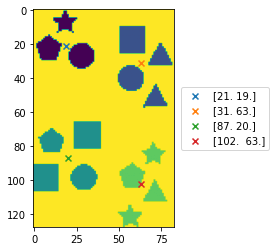

In [57]:
# Visualización
#plt.imshow(~FiguraBN,cmap='gray')
Imagen=np.ones(FiguraBN.shape)
color=[0,0.25,0.5,0.75]
for i in range(len(df)):
  Imagen[df['x'][i],df['y'][i]]=color[df['kmeans'][i]]
plt.imshow(Imagen)
for c in ctr:
  plt.scatter(c[1],c[0],marker='x',label=np.round(c))
plt.legend(loc='center left',bbox_to_anchor=(1.01,0.5))